# `Exercises (Overview)`

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

#### Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### Has the network latency gone up since we switched internet service providers?

* **null_hypothesis** = switching internet service providers makes **no difference** on the latency

* **alternate_hypothesis** = switching internet service providers makes **a difference** on the latency

* **True Positive**: The internet service provider **does** affect the network latency, and we were correct

* **True Negative**: The internet service provider **does NOT** affect the network latency, and we were correct

* **Type I Error (False Positive)**: The internet service provider **does** affect the network latency, and we were **WRONG**

* **Type II Error(False Negative)**: The internet service provider **does NOT** affect the network latency, and we were **WRONG**


#### Is the website redesign any good?

* null_hypothesis = The website redesign has **not** improved user engagement

* alternate_hypothesis = The website redesign **has** imporved user engagement

* True Positive = We conclude that the website redesign **has** improved user engagement, and we were **correct**.

* True Negative = We conclude that the website redesign has **not** improved user engagement, and we were **correct**.

* Type I Error (False Positive): We conclude that the website redesign has improved user engagement, but in reality, it has **not**.

* Type II Error (False Negative): We conclude that the website redesign has not improved user engagement, but in reality, it **has**.

#### Is our television ad driving more sales?

* null_hypothesis: The television ad does **not increase sales**.

* alternative_hypothesis: The television ad **increases sales**.

* True Positive: We conclude that the television ad **increases sales**, and this is **true**.

* True Negative: We conclude that the television ad **does not increase sales**, and this is **true**.

* Type I Error (False Positive): We conclude that the television ad **increases sales**, but in reality, **it does not**.

* Type II Error (False Negative): We conclude that the television ad **does not increase sales**, but in reality, **it does**.

# `Exercises (Comparison of Groups)`
## chi_squared_exercises

Continue working in your hypothesis_testing notebook.

In [31]:
import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats
import env

### 1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

 	                    Codeup Student       Not Codeup Student
    Uses a Macbook	        49	              20
    Doesn't Use A Macbook	1	              30

In [4]:
data_dict = {'Codeup Student': [49,1], 'Not a Codeup Student':[20,30]}
data_dict
#could also make a list of lists

{'Codeup Student': [49, 1], 'Not a Codeup Student': [20, 30]}

In [5]:
observed = pd.DataFrame(data_dict, index=['Uses a Macbook','doesn\'t Use a Macbook'])
observed

,Codeup Student,Not a Codeup Student
Uses a Macbook,49,20
doesn't Use a Macbook,1,30


#### set my hypothesis and alpha

$H_o$: There is **no** relationship between being a codeup student and using a macbook

$H_a$: There **is** a relationship between being a codeup student and using a macbook

In [6]:
alpha = 0.05

##### calculate

In [7]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 34.5],
       [15.5, 15.5]]))

In [8]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [9]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [10]:
observed.values

array([[49, 20],
       [ 1, 30]])

In [11]:
chi2, dof

(36.65264142122487, 1)

In [12]:
p

1.4116760526193828e-09

##### conclude

My p-value is **less than** alpha, therefore, we reject the null hypothesis.

We can conclude there is a relationship between being a codeup student and using a macbook.

### 2. Choose another 2 categorical variables from the mpg dataset.

In [13]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

##### setup

#### Q: Does the class of the car affect how many cylinders it has?

##### State your null and alternative hypotheses.

$H_o$: Car class is **independent** of number of cylinders.

$H_a$: Car class is **dependent** of number of cylinders

##### State your alpha.

In [15]:
alpha = 0.05

In [16]:
df.cyl.value_counts()

cyl
4    81
6    79
8    70
5     4
Name: count, dtype: int64

In [17]:
df.class.value_counts() #class is a reserved word

SyntaxError: invalid syntax (3473782885.py, line 1)

In [18]:
(df['class']).value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [19]:
observed = pd.crosstab(df.cyl, df['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


##### Perform a chi2 test of independence.

In [20]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [21]:
expected

array([[ 1.73076923, 16.26923077, 14.19230769,  3.80769231, 11.42307692,
        12.11538462, 21.46153846],
       [ 0.08547009,  0.8034188 ,  0.7008547 ,  0.18803419,  0.56410256,
         0.5982906 ,  1.05982906],
       [ 1.68803419, 15.86752137, 13.84188034,  3.71367521, 11.14102564,
        11.81623932, 20.93162393],
       [ 1.4957265 , 14.05982906, 12.26495726,  3.29059829,  9.87179487,
        10.47008547, 18.54700855]])

In [22]:
chi2, dof

(138.02824375973248, 18)

In [23]:
chi2

138.02824375973248

In [24]:
p

1.5351076620141522e-20

In [25]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0 32 16  1  3 21  8]
 [ 0  2  0  0  0  2  0]
 [ 0 13 23 10 10  7 16]
 [ 5  0  2  0 20  5 38]]

Expected
[[ 1 16 14  3 11 12 21]
 [ 0  0  0  0  0  0  1]
 [ 1 15 13  3 11 11 20]
 [ 1 14 12  3  9 10 18]]

----
chi^2 = 138.0282
p     = 0.0000


##### State your conclusion

My p-value is **less** than alpha α, therefore, we reject the null hypothesis.

We can conclude that car class is dependent on number of cylinders

### 3. Use the data from the employees database to answer these questions:

In [26]:
from env import user, password, host ### I added this and it made the first code work (w/out the env. in front)

#in my env file
def get_db_url(db, user=user, password=password, host=host):
    return (f'mysql+pymysql://{user}:{password}@{host}/{db}')


# get_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'   
                    ### From Advanced DF (I guess needed for either the above or below code?)

# def get_db_url(user, password, host, database):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'
                    ### This is how I've done it before but need more practice

In [27]:
url = env.get_db_url('employees')

In [28]:
pd.read_sql('show tables', url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [29]:
query = '''
select *
from employees as e
    join dept_emp as de
        using
    
'''

In [30]:
df = pd.read_sql(query, url)

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '' at line 4")
[SQL: 
select *
from employees as e
    join dept_emp as de
        using
    
]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [ ]:
df.head()

##### setup

There is 

##### calculate

In [ ]:
df.gender.value_counts()

In [ ]:
df.dept_name.value_counts()

In [ ]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

In [ ]:
chi2, p, dof, expected = stats.chi2.

In [ ]:
chi2, dof

In [ ]:
p

##### conclude

My p-value is greater than alpha, therefore, fail to reject the null hypothesis.

We can conclude there is no relationship between gender and department (sales or marketing only)

### Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
query = '''
select *
from dept_manager
    right join employees
        using (emp_no)
;
'''

In [ ]:
pd.read_sql(query, url)

In [ ]:
df.head()

In [ ]:
df.gender.value_counts()

In [ ]:
df.to_date.value_counts(dropna=False) #to drop the null values

#many things to clean right now because there are columns we don't need

In [ ]:
df.to_date.isnull() #checking for not null values

In [ ]:
df['is_manager'] = df.to_date.notnull()

In [ ]:
df

In [ ]:
df.is_manager.value_counts()

##### setup

there is no relationship between gender and being a manager
there is...

##### calculate

In [ ]:
observed = pd.crosstab(df.is_manager, df.gender)
observed

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [ ]:
expected

In [ ]:
chi2, dof

In [ ]:
p

##### conclude

My p-value is greater than alpha, **fail** to reject the null hypothesis.

We can conclude there is **NO** relationship between gender and being a manager.

# `Exercises (Correlation)`

Continue working in your `hypothesis_testing` notebook.

In [32]:
# matplotlib.pyplot for basic matplotlib functionality
import matplotlib.pyplot as plt

# seabon for more visualizations! 
import seaborn as sns

### 1. Answer with the type of stats test you would use (assume normal distribution):

* **Is there a relationship between the length of your arm and the length of your foot?**

    -A: correlation, pearsonsr

* **Does smoking affect when or not someone has lung cancer?**

    -A: chi2

* **Is gender independent of a person’s blood type?**

    -A: chi2

* **Does whether or not a person has a cat or dog affect whether they live in an apartment?**

    -A: chi2

* **Does the length of time of the lecture correlate with a student's grade?**

    -A: correlation

### 2. Use the `telco_churn` data.

In [13]:
url = env.get_db_url('telco_churn')

In [14]:
pd.read_sql('show tables', url)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


* **Does tenure correlate with monthly charges?**

In [15]:
query = '''
select *
from customers
	join internet_service_types
		using (internet_service_type_id)
'''

In [21]:
df = pd.read_sql(query, url)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [23]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [26]:
df.tenure.value_counts(bins=10).sort_index()

tenure
(-0.073, 7.2]    1612
(7.2, 14.4]       759
(14.4, 21.6]      570
(21.6, 28.8]      556
(28.8, 36.0]      545
(36.0, 43.2]      444
(43.2, 50.4]      452
(50.4, 57.6]      495
(57.6, 64.8]      501
(64.8, 72.0]     1109
Name: count, dtype: int64

In [27]:
### most likely represents months
df.tenure 

0        9
1        9
2        4
3       13
4        3
        ..
7038    13
7039    22
7040     2
7041    67
7042    63
Name: tenure, Length: 7043, dtype: int64

In [33]:
# use bins to group of ranges since there are so many values
df.monthly_charges.value_counts(bins=10).sort_index() #sorts by index # rather than popularity

monthly_charges
(18.148999999999997, 28.3]    1606
(28.3, 38.35]                  191
(38.35, 48.4]                  365
(48.4, 58.45]                  640
(58.45, 68.5]                  474
(68.5, 78.55]                  893
(78.55, 88.6]                  953
(88.6, 98.65]                  873
(98.65, 108.7]                 754
(108.7, 118.75]                294
Name: count, dtype: int64

<Axes: >

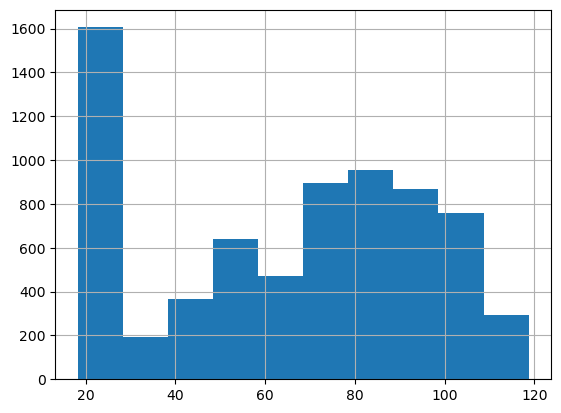

In [34]:
df.monthly_charges.hist()

In [43]:
#this is setting our confidence level
alpha = 0.05

$H_o$: There is **NO** Linear relationship between monthly charges and tenure

$H_a$: There **IS** a Linear relationship between monthly charges and tenure

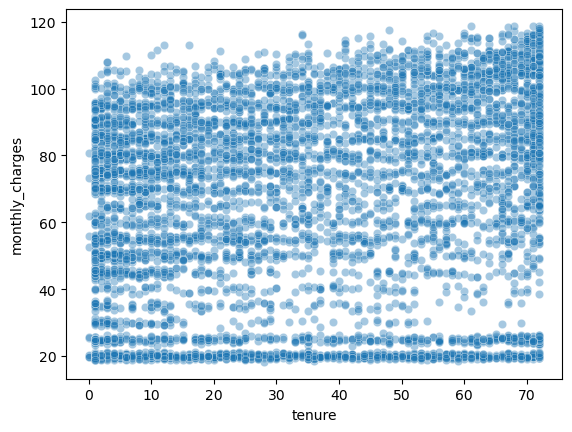

In [50]:
sns.scatterplot(data=df, y='monthly_charges', x='tenure', alpha=0.4); 
                #this alpha is not global (contained) it's a different alpha for the transparency of the plot

In [46]:
r, p = stats.pearsonr(df.monthly_charges, df.tenure)

In [47]:
r

0.24789985628615246

In [48]:
p

4.094044991476844e-99

My p-value is less than alpha, therefore, we reject the null hypothesis. 

We can conclude there **is** a linear relationship between monthly charges and tenure, **however**, it is very weak (by looking at **r**)

* **Total charges?**

In [71]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [54]:
# df.total_charges.value_counts(bins=10)   ###they are an object so doesn't work

In [56]:
# df.total_charges.astype(float)

In [60]:
df.total_charges.isnull().sum() ###no nulls in this column

0

In [62]:
df.total_charges.value_counts().index 
                ###there's a single space at the beginning and that's y it can't be made into a float

Index([' ', '20.2', '19.75', '19.9', '20.05', '19.65', '45.3', '19.55',
       '20.15', '20.25',
       ...
       '1474.75', '6448.85', '1094.5', '2548.55', '8250', '2387.75', '6302.8',
       '2058.5', '829.55', '3707.6'],
      dtype='object', name='total_charges', length=6531)

In [65]:
df.total_charges.str.strip().value_counts().index

Index(['', '20.2', '19.75', '19.9', '20.05', '19.65', '45.3', '19.55', '20.15',
       '20.25',
       ...
       '1474.75', '6448.85', '1094.5', '2548.55', '8250', '2387.75', '6302.8',
       '2058.5', '829.55', '3707.6'],
      dtype='object', name='total_charges', length=6531)

In [66]:
df.shape

(7043, 21)

In [68]:
df.total_charges.value_counts() ### let's just drop those 11 empty values since we have over 7,000 rows!

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [70]:
df[df.total_charges == ' '] #boolean mask
### here at the 11 blank ones we want to drop
### look at tenure column being zero, meaning they are likely new customers and that's
### why they have zero under total_charges

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,No,4,56.05,,No
1731,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.00,,No
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,No,Yes,No,No,3,Yes,3,61.90,,No
2025,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,Yes,2,19.70,,No
2176,3115-CZMZD,Male,0,No,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.25,,No
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,,No
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,Yes,Yes,Yes,No,3,No,2,73.35,,No
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,Yes,3,52.55,,No
4054,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,1,Yes,...,Yes,No,Yes,Yes,3,No,2,80.85,,No


In [73]:
# option to change the blank spaces to 0 and then convert to float
df.total_charges.str.replace(' ', '0.0').astype(float)

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [78]:
### alt. version where we filter them out
df = df[df.total_charges != ' '] # we had 7,043 and now we have 7,032 so we filtered the empty ones out

In [77]:
df.shape

(7043, 21)

In [81]:
df.total_charges = df.total_charges.astype(float) ###boom now the df has officially dropped the empty ones since we assigned the
                                ###df variable above

/var/folders/dw/b7g84lz929n6kfcfp39hrt0m0000gn/T/ipykernel_59069/574592314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_charges = df.total_charges.astype(float) ###boom now the df has officially dropped the empty ones since we assigned the


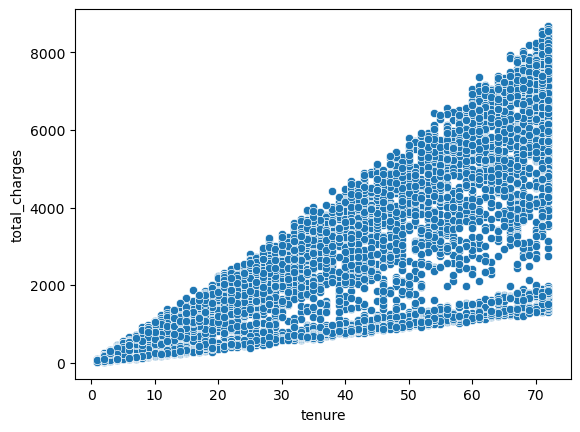

In [82]:
sns.scatterplot(data=df, x='tenure', y='total_charges');
###linear relationship

In [85]:
r, p = stats.pearsonr(df.tenure, df.total_charges)

In [86]:
r

0.8258804609332071

In [87]:
p

0.0

The p-value **is** less than alpha, therefore, we reject the null hypothesis.

We can conclude ther **is** a strong relationship between total charges and tenure

* **What happens if you control for phone and internet service?**

In [91]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.90,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.70,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [89]:
df.phone_service.value_counts()

phone_service
Yes    6352
No      680
Name: count, dtype: int64

In [92]:
df.internet_service_type_id.value_counts() ###we don't know what 1, 2, 3 means so lets do a JOIN to FIND OUT!

internet_service_type_id
2    3096
1    2416
3    1520
Name: count, dtype: int64

In [95]:
query = '''
select * 
from customers
    join internet_service_types
        using (internet_service)
;
'''

In [97]:
df = pd.read_sql(query, url)

OperationalError: (pymysql.err.OperationalError) (1054, "Unknown column 'internet_service' in 'from clause'")
[SQL: 
select * 
from customers
    join internet_service_types
        using (internet_service)
;
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
df.internet_service_type.value_counts()

In [ ]:
sns.relplot(data=df, y='monthly_charges', x='tenure',
            col='phone_service', hue='internet_service_type')

In [ ]:
def run_pearsonr(df):
    r, p = stats.pearsonr(df.monthly_charges, df.tenure)
    return pd.Series((r, p))   ###make into series to keep it pretty

In [ ]:
df.groupby(['phone_service', 'internet_service_type']).apply(run_pearsonr)

For **ALL** of these groupings, the p-value is **LESS** than alpha, therefore, we reject the null hypothesis.

We can conclude there **IS** a linear relationship for monthly charges and tenure when we control for phone service and internet service type.

### 3. Use the `employees` database.

In [98]:
url = env.get_db_url('employees')

* **Is there a relationship between how long an employee has been with the company and their salary?**

In [ ]:
query = '''
select *
from employees
    join salaries
        using (emp_no)
where to_date > now()
;
'''

In [103]:
df = pd.read_sql(query, url)

In [104]:
df.shape

(2844047, 9)

In [105]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   emp_no      int64 
 1   birth_date  object
 2   first_name  object
 3   last_name   object
 4   gender      object
 5   hire_date   object
 6   salary      int64 
 7   from_date   object
 8   to_date     object
dtypes: int64(2), object(7)
memory usage: 195.3+ MB


In [107]:
df.to_date - df.hire_date

0              365 days, 0:00:00
1              730 days, 0:00:00
2             1095 days, 0:00:00
3             1460 days, 0:00:00
4             1825 days, 0:00:00
                   ...          
2844042        365 days, 0:00:00
2844043        730 days, 0:00:00
2844044       1095 days, 0:00:00
2844045       1460 days, 0:00:00
2844046    2922337 days, 0:00:00
Length: 2844047, dtype: object

In [108]:
df['tenure_days'] = df.to_date - df.hire_date

In [112]:
df.tenure_days = df.tenure_days.astype('str').str.split(expand=True)[0]
df.tenure_days

0              365
1              730
2             1095
3             1460
4             1825
            ...   
2844042        365
2844043        730
2844044       1095
2844045       1460
2844046    2922337
Name: tenure_days, Length: 2844047, dtype: object

In [115]:
df.tenure_days = df.tenure_days.astype(int) ### might need to clean up before I change to int

ValueError: invalid literal for int() with base 10: '0:00:00'

In [113]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,365
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,730
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,1095
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,1460
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,1825


$H_o$: There is **no** linear relationship between tenure and salary

$H_a$: There **is** a linear relationship between tenure and salary

alpha = 0.05

<Axes: xlabel='tenure_days', ylabel='salary'>

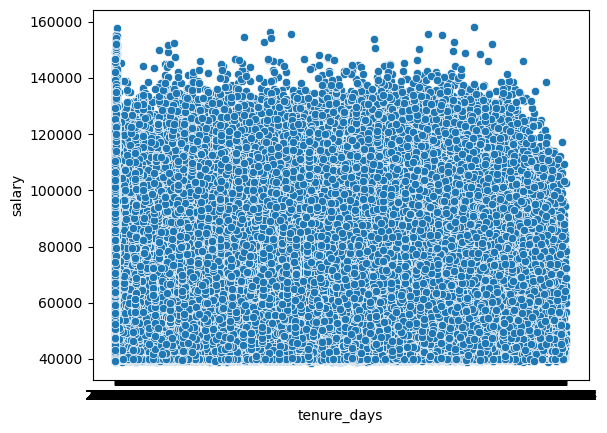

In [114]:
sns.scatterplot(data=df, x='tenure_days', y='salary')

In [ ]:
r, p = stats.pearsonr(df.tenure_days, df.salary)

In [ ]:
r

In [ ]:
p

The p-value is **LESS** than alpha, so we reject the null hypothesis.

We can conclude there **IS** a weak linear relationship between tenure

* **Is there a relationship between how long an employee has been with the company and the number of titles they have had?**

In [116]:
query = '''
select emp_no, count(title) as title_cnt
, datediff(max(to_date), hire_date) as tenure_days
from employees
    join titles
        using(emp_no)
group by emp_no
having max(to_date) > now()
;
'''

In [119]:
df = pd.read_sql(query, url)

In [120]:
df.title_cnt.value_counts()

title_cnt
2    125345
1    111892
3      2887
Name: count, dtype: int64

<Axes: >

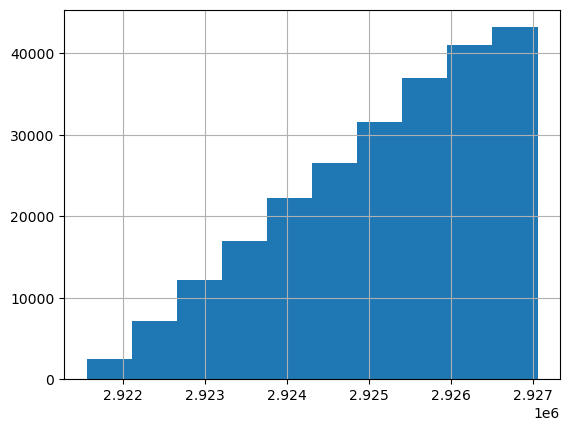

In [121]:
df.tenure_days.hist()

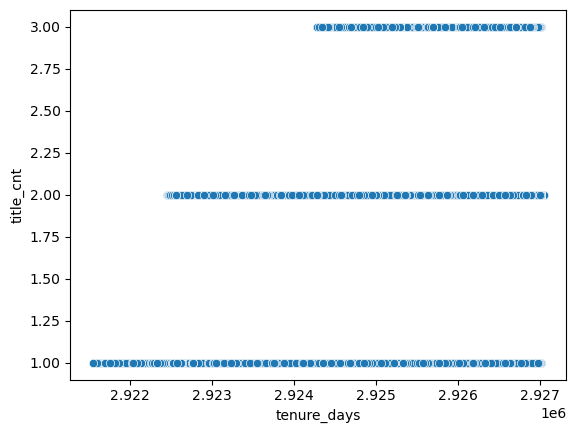

In [123]:
sns.scatterplot(data=df, x='tenure_days', y='title_cnt');
                    ###looks like this because title counts are whole numbers
                    ###can't have 2.5 titles 
        
### more discrete cus of title_cnt so use spearmanr rather than pearsonr
        ### LOOK at he GAPS

$H_o$: There is **NO** linear relationship between number of titles and how long an employee has been there

$H_a$: There **IS** a linear relationship between number of titles and how long an employee has been there

alpha = 0.05

In [124]:
stats.spearmanr(df.tenure_days, df.title_cnt) #similar...

SignificanceResult(statistic=0.25489028077289544, pvalue=0.0)

In [125]:
stats.pearsonr(df.tenure_days, df.title_cnt) #weak correlation...

PearsonRResult(statistic=0.2871267889704716, pvalue=0.0)

The p-value is less than alpha, so we reject the null hypothesis.
 
There is a relationship between tenure and number of titles.

### 4. Use the `sleepstudy` data.

* **Is there a relationship between days and reaction time?**

In [126]:
df = data('sleepstudy')

In [127]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [130]:
df.Days.value_counts() #more of a discrete variable...

Days
0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: count, dtype: int64

In [132]:
df.Reaction.value_counts() #no repeats so more of a continuous variable...

Reaction
249.5600    1
255.5271    1
329.7247    1
379.4445    1
362.9184    1
           ..
289.5550    1
276.7693    1
299.8097    1
297.1710    1
364.1236    1
Name: count, Length: 180, dtype: int64

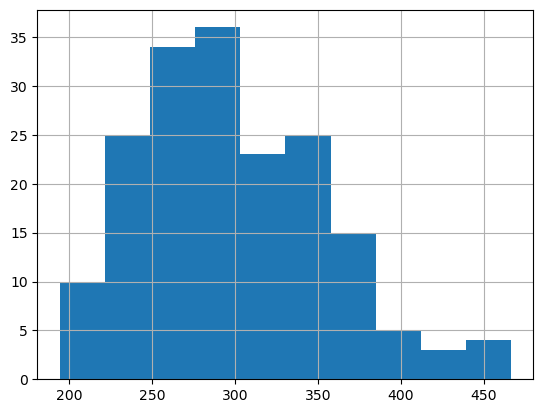

In [134]:
df.Reaction.hist(); #majority around 250-300

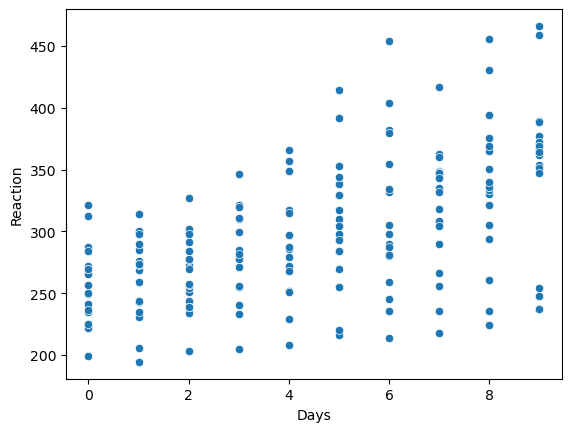

In [139]:
sns.scatterplot(data=df, x='Days', y='Reaction');
### more discrete cus of Days so use spearmanr rather than pearsonr
        ### LOOK at he GAPS

In [136]:
stats.spearmanr(df.Days, df.Reaction)

SignificanceResult(statistic=0.5228138502259547, pvalue=5.132878057706873e-14)

In [137]:
stats.pearsonr(df.Days, df.Reaction)

PearsonRResult(statistic=0.5352302262650255, pvalue=9.894096322214486e-15)

The p-value is **lESS** than alpha, so we reject the null hypothesis.

There **IS** a correlation between days and reaction time in the sleep study

# `Exercises (Comparison of Means)`
### means_test_exs.ipynb

Continue working in your `hypothesis_testing` notebook.

### 1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

    A: 1-sample, 2-tail
What variable(s) am I testing?
* grades of students

What type of variable is that? (datatype)
* continuous!

Is there a 2nd variable I'm camparing grades to?
* No, I'm just coparing grades on their face, but looking at two different slices of grades

Based on that much... are we doing a means test, proportions, or correlation test?
* **means test**: a single continuous variable across categories

Now that I know that I'm doing a means test:
* One tailed/Two tailed, One sample/Two sample:

one or two sample?
* **One sample!** Comparing grades of 2nd floor students to all students (all students in this case represents our population)

one or two tailed?
* **Two tailed!** We are just asking if the grades of 2nd floor students are different, not that they are specifically higher or lower.

* Are adults who drink milk taller than adults who don't drink milk?

    A: 2-sample, 1-tail

In [140]:
# What variables?
# height ==> how tall the person is
# drink milk vs not drink milk ==> category that we are separating height by
#  A continuous var (height) across two categories (drink milk v not drink milk)
# 
# Based on that:
# means test! one continuous var (height)
# I know its going to be a t test:
# one/two tails? samples?
# Samples? ==> Two: drink milk vs not drink milk
# Tails? ==> One: two tailed would be asking if there was a difference, 
# but we are interested in looking specifically if one
# party is taller.

* Is the price of gas higher in Texas or in New Mexico?

    A: 2-sample, 1-tail

In [141]:
# Variable: gasoline price\
# Category across variable: State (Tx vs NM)
# single continuous variable across two categories: means test!
# T test stipulations:
# Tails?: One: price of gas specifically higher (not just different)
# Samples?: Two: Texas vs New Mexico specifically

* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

    A: 3-sample (ANOVA) (assumed 2 tailed)

In [142]:
# Variable(s)? ==> stress level (continuous(?))
# Categories of stress: CAP, DS, WD
# What type of test?
# three categories, one continuous variable:
# technically a means test, but more specifically:
# Analysis of variance (ANOVA, (f-oneway))
# What if stress is a discrete variable?
# If it manifested as low, medium, high
# Then we are looking at three different categories:
# (low, medium, high) X (Cap, ds, wd)
# proportion test! χ^2 test!

In [143]:
# tabular data
import numpy as np
import pandas as pd

# stats from scipy
from scipy import stats

# matplotlib for visualizations
import matplotlib.pyplot as plt

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

2-sample, 2-tail

In [144]:
# Looking at these two samples:
# 40 sales from office #1:
# distributed with a mean of 90 days and a std of 15 days
# 50 sales from office #2:
# distributed with a mean 100 days and a standard deviation of 20 days

# stats.ttest_ind_from_stats?

In [145]:
# simulations of the offices in two different ways:
# way 1: use numpy's normal random sample
office_1 = np.random.normal(90, 15, size=(40,))
office_2 = np.random.normal(100, 20, size=(50,))
# alternatively, another simulation method:
# using stats to simulate a normal dist and then take Random ValueS
office_1 = stats.norm(90,15)
office_2 = stats.norm(100,20)

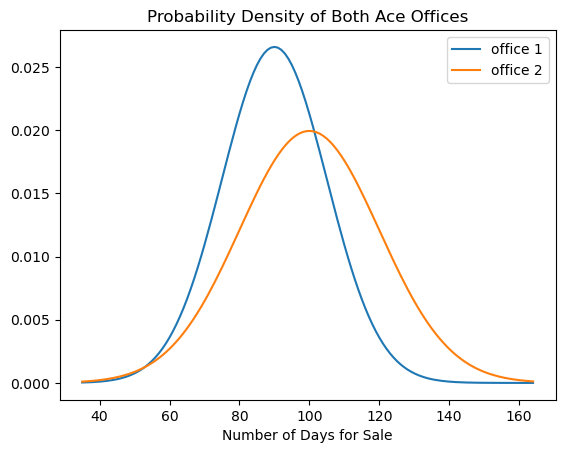

In [146]:
# a little bit of extra exploration:
x = np.arange(35, 165)
y1 = [office_1.pdf(n) for n in x]
y2 = [office_2.pdf(n) for n in x]
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label='office 2')
plt.legend()
plt.title('Probability Density of Both Ace Offices')
plt.xlabel('Number of Days for Sale')
plt.show()

In [ ]:
# option 1:
# use the simulations that I just created
# option 2: use ttest_ind_from_stats

In [ ]:
# option 1:
# lets take the two simulated versions
# Parameters:
# We know they are normal specifically because we defined them as so
# Do we know that they have equal variance?
# Well we know the stds are different,
# but lets see what a levene test says

In [147]:
# Levene Set-Up
# H0: The variance in office 1 sales is equivalent to office 2 sales
# H1: the variance in office 1 sales is different from office 2
# confidence level: standard, 95% ==? 0.95
#  ==> alpha: 0.05
lv_stat, p = stats.levene(office_1.rvs(40), office_2.rvs(50))
if p < 0.05:
    print('I can reject H0')
else:
    print('We fail to reject h0')

We fail to reject h0


In [ ]:
# we fail to reject the null hypothesis, which means that
# we cannot assert that these have different variances
# which means that students ttest will do.

$H_o$: There is no difference in the average sale time between office 1 and office 2
 
$H_a$: There is a difference in the average sale time for office 1 to office 2

In [148]:
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    α=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < α:
            print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < α) and (stat > 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < α) and (stat < 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')

In [149]:
# alpha: 0.05
α = 0.05
t_stat, p = stats.ttest_ind(
    office_1.rvs(40),
    office_2.rvs(50),
    equal_var=True)

In [150]:
t_stat

-2.552753913118582

In [151]:
p

0.012411242334383031

In [152]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.012411242334383031 
 Our statistic value is -2.552753913118582


In [153]:
# stats.ttest_ind_from_stats?

In [154]:
# solve this the other way:
t_stat, p = stats.ttest_ind_from_stats(
    90,
    15,
    40,
    100,
    20,
    50
)

In [155]:
t_stat

-2.6252287036468456

In [156]:
p

0.01020985244923939

In [157]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.01020985244923939 
 Our statistic value is -2.6252287036468456


In [158]:
from pydataset import data

## 3. Load the `mpg` dataset and use it to answer the following questions:

In [159]:
mpg = data('mpg')

In [161]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [162]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [163]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

* 2-sample, 2-tail

In [ ]:
# lets create a new column for fuel efficiency based on
# the average between city and highway mileage

In [ ]:
# stats.hmean((mpg.cty, mpg.hwy))

In [164]:
# reassign mpg into a version of itself
# but this time with a new column called fuel_e
# that holds the harmonic mean between city and highway mileage
# huzzah!
mpg = mpg.assign(fuel_e = stats.hmean((mpg.cty, mpg.hwy)))

In [165]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  fuel_e        234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [166]:
# same flow chart from before:
# what variables am I examining?
# fuel efficiency! I just created it! Its continuous! Its one thing!
# Fuel efficiency across two categories, though!
# years of vehicles in 99 vs vehicles from '08

In [167]:
mpg.year.unique()

array([1999, 2008])

In [168]:
# If I want to proceed forward with testing here:
# mpg dataframe, where the mpg dataframe year is 1999 ==> specifically the fuel_e Series
# mpg dataframe where mpg dataframe year is 2008 ==> specifically the fuel_e Series

In [169]:
fuel_2008 = mpg[mpg.year == 2008].fuel_e
fuel_1999 = mpg[mpg.year == 1999].fuel_e

In [170]:
# to continue with means testing:
# normality
# variance
# independence
# normality? 
fuel_2008.shape

(117,)

In [171]:
fuel_1999.shape

(117,)

In [172]:
# so I have 117 samples for each, I'll toss that in with CLT assumtions
# but put a pin in it to revisit

In [173]:
# variance:
# lets run a levene test:
# H0: the variance is equivalent for 99 vehicles compared to 2008 vehicles
# Ha: the variance is different for 99 vehicles compared to 08 vehicles
lev_stat, p = stats.levene(fuel_1999, fuel_2008)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.8602339200830025.
 Our statistic is 0.031071867429515194


In [174]:
# independence? We know that there are no samples in this dataframe
# that are 2008 and 1999.  These are exclusive.
# 
# two tailed ==> we want to know if there is a difference in general
# two sampled ==> 1999 vs 2008, not one of those against all cars
# proceeding forward with our means test:
t_stat, p = stats.ttest_ind(fuel_1999,
                            fuel_2008,
                            equal_var=True)
test_hypothesis(p, t_stat)
    

We fail to reject the null hypothesis :(.
 Our p-value is 0.7635345888327115.
 Our statistic is 0.3011962975077886


### Are compact cars more fuel-efficient than the average car?

* 1-sample, 1-tail

In [175]:
# one sample or two sample?
# one sample: compact cars vs all cars
# one tail or two tailed?
# one tailed: *more* fuel efficient

In [176]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [178]:
# so lets proceed forward with a one-tailed one sample test!
# just the compact cars from mpg, specifically the fuel efficiency:
fuel_compact = mpg[mpg['class'] == 'compact'].fuel_e

In [182]:
# stats.ttest_1samp?

In [183]:
# calculate the population mean for fuel efficiency
μ = mpg.fuel_e.mean()

In [184]:
t_stat, p = stats.ttest_1samp(fuel_compact,
                              μ)

In [185]:
t_stat

7.512360093161361

In [186]:
p

1.5617666348807277e-09

$H_o$: The fuel efficiency of compact cars is the same or less than the fuel efficiency of cars overall

$H_a$: The fuel efficiency of compact cars is greater than the fuel efficiency of cars overall

In [187]:
test_hypothesis?

In [ ]:
# I want to test that 
# the fuel efficiency of compact cars is greater,
# so my t_stat should be positive if I reject my H0
# and I want to check p/2 against alpha instead of just p.
# this is handled
# based on the way we defined test_hypothesis
# and the fact that we fed in our arguments
# as the sample we compared against
# the population, 
# which the alternative hypothesis was looking for a difference
# in the greater-than direction.
# the positive tail of the t-distribution)
test_hypothesis(p,
                t_stat,
                tails='one')

### Do manual cars get better gas mileage than automatic cars?
* 2-sample, 1-tail

In [188]:
# pandas refresher:
# mpg dataframe
# mpg
# just the transmission series:
# mpg.trans
# the values inside of the trans column but lowercase:
# needs a .str to do a string method on the values in that series
# mpg.trans.str.lower() ==> note parens on lower because method
# the output of that method is still a series full of strings
mpg.trans.str.lower().head(5)

1      auto(l5)
2    manual(m5)
3    manual(m6)
4      auto(av)
5      auto(l5)
Name: trans, dtype: object

In [189]:
# my god, its full of strings
# take those lower case strings
# and just check to see if the first letter is 'a':
# this will return a boolean because its a logic check:
mpg.trans.str.lower().str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [190]:
# if I tossed values in there with a np.where, etc
# then I would be needing to do a mask that looked a little more
# like
# mpg[mpg.is_auto == 'auto']
# buuuuut:

In [191]:
# if I assign it as a bool directly:
mpg['is_auto'] = mpg.trans.str.lower().str.startswith('a')
# then I can use that info directly as a mask since it already renders
# as a boolean

In [196]:
manual_fe = mpg[~mpg.is_auto].fuel_e
auto_fe = mpg[mpg.is_auto].fuel_e

Set up our hypothesis test:

$H_o$: Manual vehicles get the same mileage as automatic vehicles or manual vehicles in fact get lower average mileage than automatic vehicles

$H_a$: Manual vehicles get a better average mileage than automatic vehicles

In [197]:
# parameters:
# enough samples ==> presume normality (shapiro if we are picky)\
# (if shapiro fails, do a mann-whitneyu test)
# assert equal variance:
# lets do a quick levene

In [198]:
# H0: auto and manual mpg have equal variance
# Ha: ato and manual mpg have inequal variance
lev_stat, p = stats.levene(manual_fe, auto_fe)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.9062462281015493.
 Our statistic is 0.013901207169738269


In [199]:
# lets do our means test
# one tailed!
# we want to check that manual cars may get better fuel efficience
# we want to check that manual vehicle mpg > auto vehicle mpg
# so we will feed them that order, and expect t_stat > 0 in order
# to reject the null hypothesis
# if man.mpg > auto.mpg ==> positive t_stat ==> reject null if p(/2) is also OK
t_stat, p = stats.ttest_ind(
    manual_fe,
    auto_fe,
    equal_var=True)
test_hypothesis(p,
                t_stat,
                tails='one',
               α=0.05)

We can reject our null hypothesis!.
 Our p-value is 5.510464610044009e-06 
 Our statistic value is 4.652577547151351
